In [13]:
import glob
import re
import sys
sys.path.append("o3inspiralhom/scripts/")

import h5py
import glob
import numpy as np
import matplotlib.pyplot as plt

import argparse
from ConfigParser import ConfigParser
import os, sys
import logging
import numpy as np
import scipy.stats as sts
import scipy.optimize as opt
from mpmath import quad, inf, exp, pi
from fitter import Fitter
import h5py
import pycwt


import lal
import lalsimulation as lalsim
import pycbc.frame
import pycbc.psd 
from pycbc.filter import highpass_fir, resample_to_delta_t

import noisebg
from calndm import FindNonDimensionalFrequency
import utils
mUtils = utils.MiscellaneousUtils()

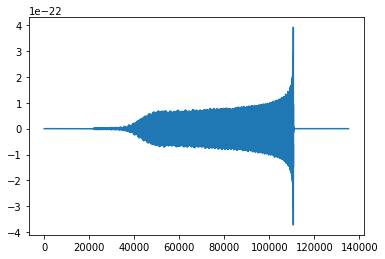

In [4]:
from pycbc import frame
import scipy.fftpack 
frame_path="/home/rahul.kashyap/o3_highermodes/injection_o3HMinsp/HOM_inj/inj0/"

data = np.loadtxt(frame_path+'hwinjcbc_1249852230_H1.txt')

#wf = pycbc.frame.read_frame(frame_path+'H1-HWINJ.gwf', 'G1:DER_DATA_H')
plt.plot(data)
plt.show()


In [5]:
track_max_length=0.45

mUtils.mass1=36.0
mUtils.mass2=9.0
fSchwarzISCO = 1.0 / ( 6.0**1.5 * lal.PI * (mUtils.mass1 + mUtils.mass2) * lal.MTSUN_SI )
print(fSchwarzISCO)
mUtils.track_max_length = track_max_length
mUtils.cwt_fhigh = args.cwt_fhigh

97.7149931353


NameError: name 'args' is not defined

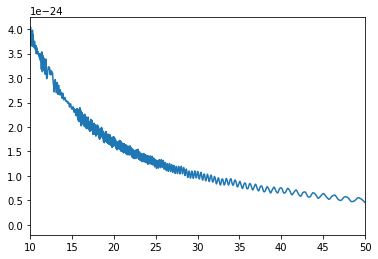

In [127]:
N=len(data)
T=1./4096.
yf = scipy.fftpack.fft(data)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xlim([10,50])
plt.show()

In [6]:

path="/home/soumen.roy/HHM/o3inspiralhom/inspiral_hom_contribution/GW190412/C01/test_dfdt/test5/onsource_beta0814/data/"
#path="/home/soumen.roy/HHM/o3inspiralhom/inspiral_hom_contribution/GW190412/C01/test_dfdt/test5/data/"
filelist=glob.glob(path+'*.h5')

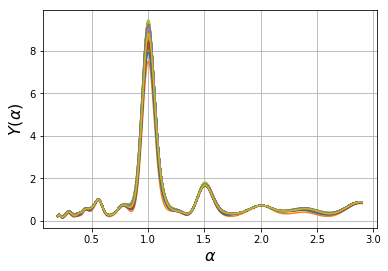

In [7]:
delta_alpha_23=[]
for i,file in enumerate(filelist[0:299]):
    #print file
    f=h5py.File(file,'r')
    ds=np.array(f['analysis']['Yalpha'])

    alpha=f['analysis']['alpha_arr'][:]
    #print len(alpha)
    #print f['analysis']['Yalpha'][140:180]
    i_22max=160+np.argmax(f['analysis']['Yalpha'][141:181],axis=0)
    #print i_22max
    #print f['analysis']['alpha_arr'][i_22max], f['analysis']['Yalpha'][i_22max]
    
    i_33max=270+np.argmax(f['analysis']['Yalpha'][251:291],axis=0)
    #print i_33max
    #print f['analysis']['alpha_arr'][i_33max], f['analysis']['Yalpha'][i_33max]
    
    delta_alpha_23.append(f['analysis']['alpha_arr'][i_33max]-f['analysis']['alpha_arr'][i_22max])
    
    plt.plot( f['analysis']['alpha_arr'][:], f['analysis']['Yalpha'][:] )
     
#np.save("delta_alpha_23_190814",delta_alpha_23) 
plt.xlabel( r"$\alpha$", fontsize=16 )
plt.ylabel( r"$Y(\alpha)$", fontsize=16 )
plt.grid(True)
plt.show()

In [75]:
print max(f['analysis']['alpha_arr'][:])

2.9


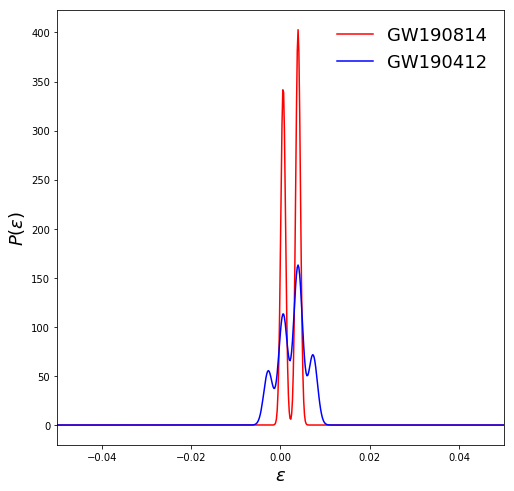

In [30]:
from scipy import stats

plt.figure(figsize=(8,8))
alph_arr=np.linspace(0.2,2.9,10000)
eps_arr=(alph_arr*2-1)/3.
#print alph_arr

delta_alpha_23_190412=np.load("delta_alpha_23_190412.npy")
delta_alpha_23_190412=(delta_alpha_23_190412*2-1)/3.
kernel = stats.gaussian_kde(delta_alpha_23_190412)
#pdf_alpha_190412=kernel(alph_arr)
pdf_eps_190412=kernel(eps_arr)

delta_alpha_23_190814=np.load("delta_alpha_23_190814.npy")
delta_alpha_23_190814=(delta_alpha_23_190814*2-1)/3.
kernel = stats.gaussian_kde(delta_alpha_23_190814)
#pdf_alpha_190814=kernel(alph_arr)
pdf_eps_190814=kernel(eps_arr)

#plt.plot(alph_arr,pdf_alpha_190814,'r',label="GW190814")
#plt.plot(alph_arr,pdf_alpha_190412,'b',label="GW190412")

#n, bins, patches = plt.hist(delta_alpha_23, 10, density=True, facecolor='g', alpha=0.75)
plt.plot(eps_arr,pdf_eps_190814,'r',label="GW190814")
plt.plot(eps_arr,pdf_eps_190412,'b',label="GW190412")

#print pdf_alpha_190814
#plt.xlabel(r"$\Delta\alpha_{23}$", fontsize=16)
#plt.ylabel(r"$P(\Delta\alpha_{23})$", fontsize=16)

plt.xlabel(r"$\epsilon$", fontsize=18)
plt.ylabel(r"$P(\epsilon)$", fontsize=18)


#plt.title(r"190412, KDE PDF $\Delta \alpha_{23}$")
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(-0.05, 0.05)
#plt.ylim(0, 0.03)
#plt.grid(True)
plt.legend(frameon=False,fontsize=18)
plt.savefig("190412_190814_KDE_eps.pdf",dpi=150)
plt.show()

# Inspiral Higher mode analysis for LVC/O3 events